In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy import constants as const
from scipy import sparse

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si
from twod_trap import DoubleTweezer

In [20]:
initial_power = 50* si.uW
initial_waist = 1.1*si.uW
initial_distance = 1.7*si.um

trap: DoubleTweezer = DoubleTweezer(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0*si.G/si.cm,
    grad_r=0,
    power_tweezer1 = initial_power,     #stationary
    power_tweezer2 = initial_power,     #transfer tweezer
    waist_tweezer1 = initial_waist,     #stationary
    waist_tweezer2 = initial_waist,     #transfer tweezer
    distance_tweezers = initial_distance,

    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),
    wvl = 532 * si.nm,

    g = 0,
)

## Sparse matrix hamiltonian:

In [ ]:
n_pot_steps = [30,30,30]
n_levels = 8

left_cutoff = -0.5*initial_distance-2*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
right_cutoff = 0.5*initial_distance+2*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
back_cutoff = -2*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
front_cutoff = 2*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
bottom_cutoff = -1.2*np.max([float(trap.subs(trap.get_tweezer_rayleigh1())),float(trap.subs(trap.get_tweezer_rayleigh2()))])
top_cutoff = 1.2*np.max([float(trap.subs(trap.get_tweezer_rayleigh1())),float(trap.subs(trap.get_tweezer_rayleigh2()))])

extend = [(left_cutoff,right_cutoff),
          (back_cutoff,front_cutoff),
          (bottom_cutoff,top_cutoff)]


# Solve the hamiltonian numerically
energies, states, potential, coords = trap.nstationary_solution(
        [trap.x,trap.y,trap.z], extend, n_pot_steps, k=n_levels)

x = coords[trap.x]
y = coords[trap.y]
z = coords[trap.z]
x3D,y3D,z3D = np.meshgrid(coords[trap.x],coords[trap.y],coords[trap.z],indexing="ij")
pot = potential(x3D,y3D,z3D)


In [ ]:
state_number = 0


plt.plot(x,states[state_number,:,int(len(y)/2),int(len(z)/2)])
plt.plot(x,1e27*pot[:,int(len(y)/2),int(len(z)/2)])
plt.show()

plt.plot(y,states[state_number,int(len(x)/3),:,int(len(z)/2)])
plt.plot(y,1e27*pot[int(len(x)/3),:,int(len(z)/2)])
plt.show()

plt.plot(z,states[state_number,int(len(x)/3),int(len(y)/2),:])
plt.plot(z,1e27*pot[int(len(x)/3),int(len(y)/2),:])
plt.show()

## Matrix free with LinearOperator

In [21]:
n_pot_steps = [100,100,100]
n_levels = 8

left_cutoff = -0.5*initial_distance-2*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
right_cutoff = 0.5*initial_distance+2*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
back_cutoff = -2*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
front_cutoff = 2*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
bottom_cutoff = -1*np.max([float(trap.subs(trap.get_tweezer_rayleigh1())),float(trap.subs(trap.get_tweezer_rayleigh2()))])
top_cutoff = 1*np.max([float(trap.subs(trap.get_tweezer_rayleigh1())),float(trap.subs(trap.get_tweezer_rayleigh2()))])

extend = [(left_cutoff,right_cutoff),
          (back_cutoff,front_cutoff),
          (bottom_cutoff,top_cutoff)]


# Solve the hamiltonian numerically
energies, states, potential, coords = trap.nstationary_solution(
        [trap.x,trap.y,trap.z], extend, n_pot_steps, k=n_levels,
        method="matrix_free", export=True)

x = coords[trap.x]
y = coords[trap.y]
z = coords[trap.z]
x3D,y3D,z3D = np.meshgrid(coords[trap.x],coords[trap.y],coords[trap.z],indexing="ij")
pot = potential(x3D,y3D,z3D)


files saved with ...._2025-03-18_13-22-26


(10.0, 100.0)

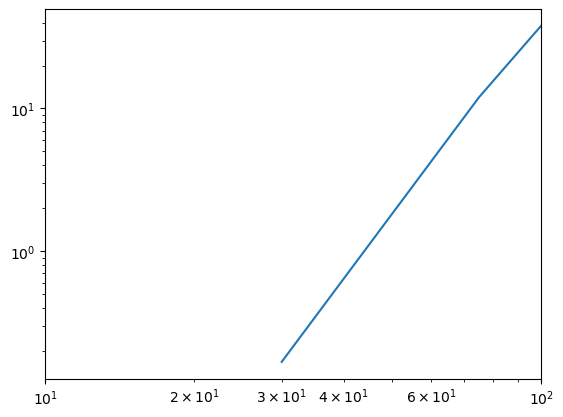

In [22]:
plt.loglog(np.array([30,75,100]),np.array([10/60,12,38])) #time in min
plt.xlim(1e1,1e2)

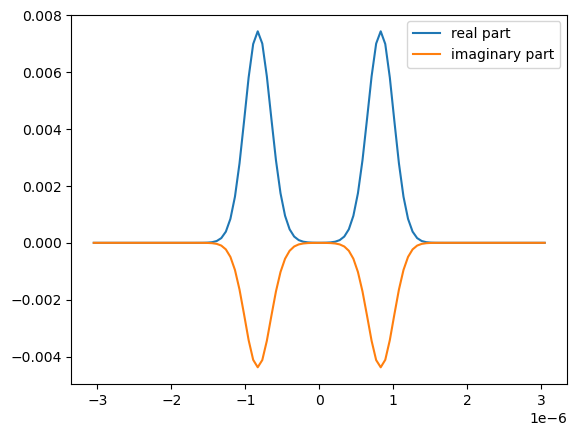

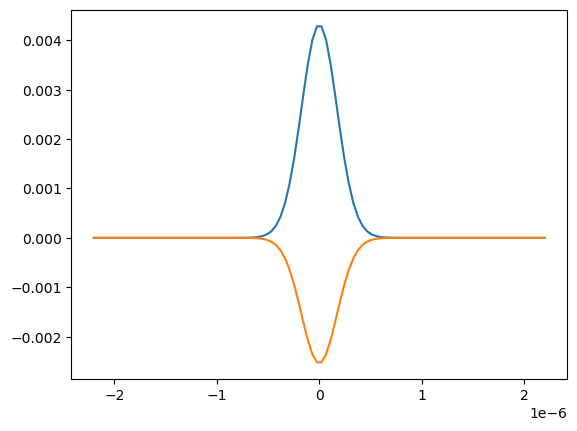

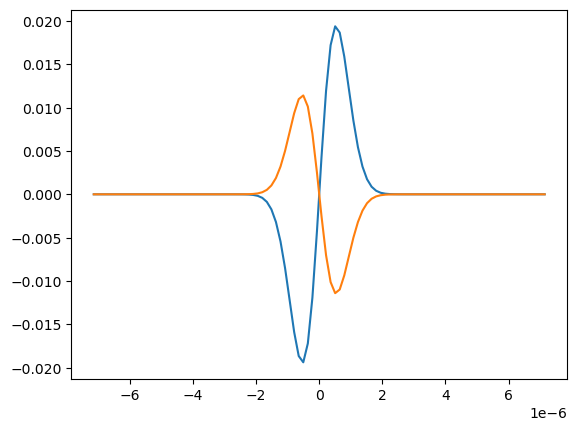

In [23]:
state_number = 3

plt.plot(x,states[state_number,:,int(len(y)/2),int(len(z)/2)].real, label="real part")
plt.plot(x,states[state_number,:,int(len(y)/2),int(len(z)/2)].imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()

plt.plot(y,states[state_number,int(len(x)/3),:,int(len(z)/2)].real, label="real part")
plt.plot(y,states[state_number,int(len(x)/3),:,int(len(z)/2)].imag, label="imaginary part")
#plt.plot(y,1e27*pot[int(len(x)/3),:,int(len(z)/2)], label="potential (rescaled)")
plt.show()

plt.plot(z,states[state_number,int(len(x)/3),int(len(y)/2),:].real, label="real part")
plt.plot(z,states[state_number,int(len(x)/3),int(len(y)/2),:].imag, label="imaginary part")
#plt.plot(z,1e27*pot[int(len(x)/3),int(len(y)/2),:], label="potential (rescaled)")
plt.show()

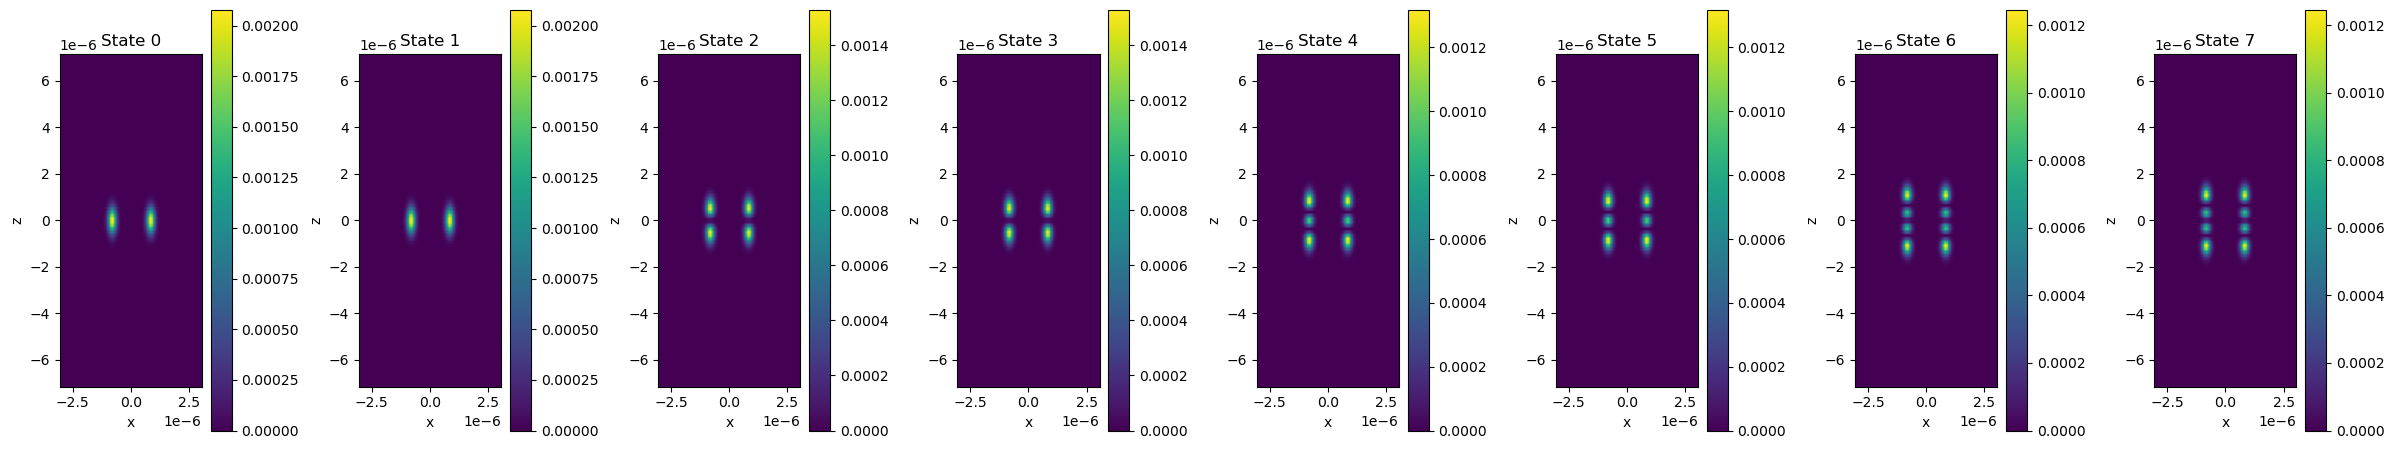

In [24]:
n_states = 8

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(18/6*n_states, 5))  # Adjust the size as needed

# Loop over the state numbers from 0 to 5
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(np.abs(states[state_number, :, int(len(y)/2), :].T)**2, extent=[*extend[0], *extend[2]], origin="lower",
                   vmin=np.min(np.abs(states[state_number])**2), vmax=np.max(np.abs(states[state_number])**2))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#state to plot
state_number = 1

# path to store animation
anim_path = f"animations/state{state_number}.gif"
"""
# results file containing the energies and states
data = np.load("data/results_300.npz")
for key in data.keys():
    globals()[key] = data[key]

# parameters file for coordinates, potential, etc.
data = np.load("data/parameters_300.npz")
for key in data.keys():
    globals()[key] = data[key]"""

x3D, y3D, z3D = np.meshgrid(x, y, z,indexing="ij")  # Ensure correct indexing

extend = [(x.min(),x.max()),
          (y.min(),y.max()),
          (z.min(),z.max())]

n_pot_steps = [len(x),len(y),len(z)]

# Create figure and axis
fig, ax = plt.subplots()
im = ax.imshow(np.abs(states[state_number, :, :, 0])**2, extent=[*extend[1], *extend[0]], origin="lower",
               vmin=np.min(np.abs(states[state_number])**2), vmax=np.max(np.abs(states[state_number])**2))

plt.xlabel("y")
plt.ylabel("x")
plt.colorbar(im)

# Initialize contour as None before defining it globally
contour = None

vmin = np.min(pot)
vmax = np.max(pot)

# Animation update function
def update(frame):
    global contour  # Ensure we're modifying the global variable

    im.set_data(np.abs(states[state_number, :, :, frame])**2) # Update image data
    ax.set_title(f"z={z[frame]/si.um:.3f}um")  # Update title

    # Remove old contours if they exist
    if contour is not None:
        for c in contour.collections:
            c.remove()

    # Redraw contour plot
    contour = ax.contour(pot[:, :, frame], levels=np.linspace(vmin, vmax, 10), colors='white', linewidths=0.7, extent=[*extend[1], *extend[0]])

# Create the first contour plot after defining update()
contour = ax.contour(pot[:, :, 0], levels=np.linspace(vmin, vmax, 10), colors='white', linewidths=0.7, extent=[*extend[1], *extend[0]])

# Create animation
frames = n_pot_steps[2]  # Number of slices
ani = animation.FuncAnimation(fig, update, frames=frames, interval=100)


ani.save(anim_path, writer="pillow", fps=frames/5)  # Save as GIF

plt.show()